In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyreadstat

In [3]:
# baca file CSV
df = pd.read_csv("retail_sales_dataset.csv")

# tampilkan 5 baris pertama
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
# Menghitung persentase missing value per kolom
col_missing_percentage = (df.isnull().sum(axis=0) / len(df)) * 100

# Menampilkan persentase missing value
print("\nPersentase missing value per kolom:")
print(col_missing_percentage)


Persentase missing value per kolom:
Transaction ID      0.0
Date                0.0
Customer ID         0.0
Gender              0.0
Age                 0.0
Product Category    0.0
Quantity            0.0
Price per Unit      0.0
Total Amount        0.0
dtype: float64


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
print(df)

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    Male   34           Beauty   
1                 2 2023-02-27     CUST002  Female   26         Clothing   
2                 3 2023-01-13     CUST003    Male   50      Electronics   
3                 4 2023-05-21     CUST004    Male   37         Clothing   
4                 5 2023-05-06     CUST005    Male   30           Beauty   
..              ...        ...         ...     ...  ...              ...   
995             996 2023-05-16     CUST996    Male   62         Clothing   
996             997 2023-11-17     CUST997    Male   52           Beauty   
997             998 2023-10-29     CUST998  Female   23           Beauty   
998             999 2023-12-05     CUST999  Female   36      Electronics   
999            1000 2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50           1

# **1. Visualisasi**

## **A. Produk: Apa yang paling laku & menyumbang pemasukan?**

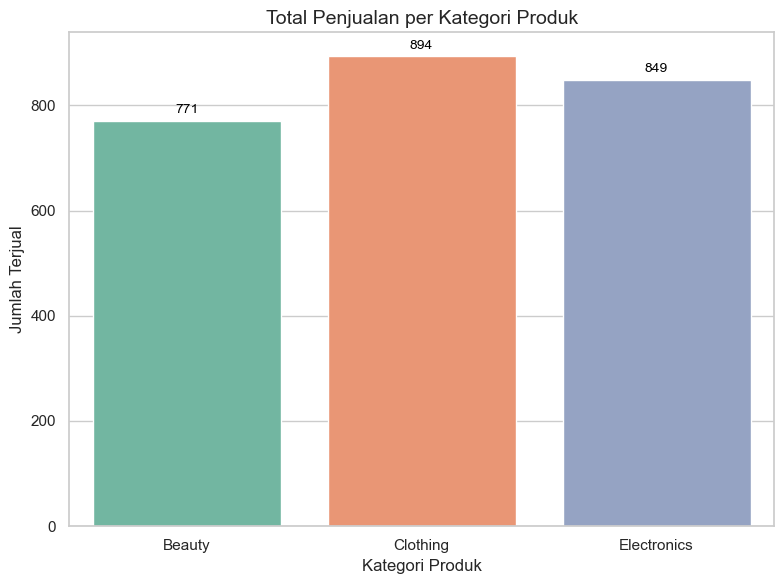

In [41]:
category_sales = df.groupby('Product Category')['Quantity'].sum().reset_index()

# --- Plot bar chart ---
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=category_sales,
    x='Product Category',
    y='Quantity',
    hue='Product Category',   
    dodge=False,              
    legend=False,             
    palette='Set2'
)

# --- Anotasi di atas batang ---
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{int(height)}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        fontsize=10, color='black',
        xytext=(0, 3),
        textcoords='offset points'
    )

plt.title("Total Penjualan per Kategori Produk", fontsize=14)
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Terjual")
plt.tight_layout()

# Menyimpan gambar dengan resolusi tinggi (dpi 300)
plt.savefig('Total Penjualan pper Kategori Produk.png', dpi=300, bbox_inches='tight')
plt.show()

In [43]:
category_summary = df.groupby("Product Category").agg({
    "Quantity": "sum",
    "Total Amount": "sum"
}).reset_index()

category_summary.rename(columns={"Total Amount": "Revenue"}, inplace=True)
category_summary.head()

,Product Category,Quantity,Revenue
0,Beauty,771,143515
1,Clothing,894,155580
2,Electronics,849,156905


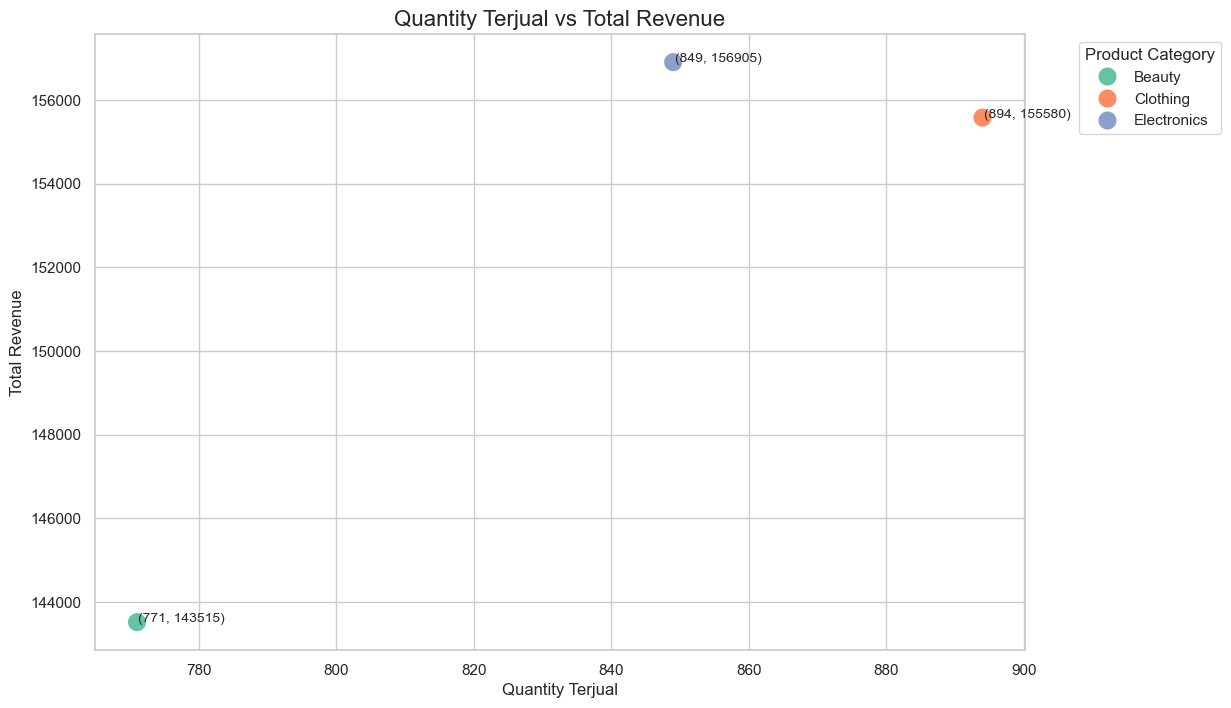

In [45]:
# Set style dan palette
sns.set_style("whitegrid")
palette = sns.color_palette("Set2", n_colors=len(category_summary))

plt.figure(figsize=(12,8))
scatter = sns.scatterplot(
    data=category_summary, 
    x='Quantity', 
    y='Revenue', 
    hue='Product Category', 
    s=200, 
    palette=palette
)

# Anotasi tiap titik dengan (x, y)
for i in range(len(category_summary)):
    x_val = category_summary['Quantity'][i]
    y_val = category_summary['Revenue'][i]
    plt.text(
        x=x_val + 0.2,
        y=y_val + 0.2,
        s=f'({x_val}, {y_val})',
        fontsize=10
    )

plt.title('Quantity Terjual vs Total Revenue', fontsize=16)
plt.xlabel('Quantity Terjual', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menyimpan gambar dengan resolusi tinggi (dpi 300)
plt.savefig('Quantity Terjual vs Total Revenue.png', dpi=300, bbox_inches='tight')
plt.show()

## **B. Bagaimana transaksi tiap bulannya? Apakah ada pola tertentu, seperti saat liburan?**

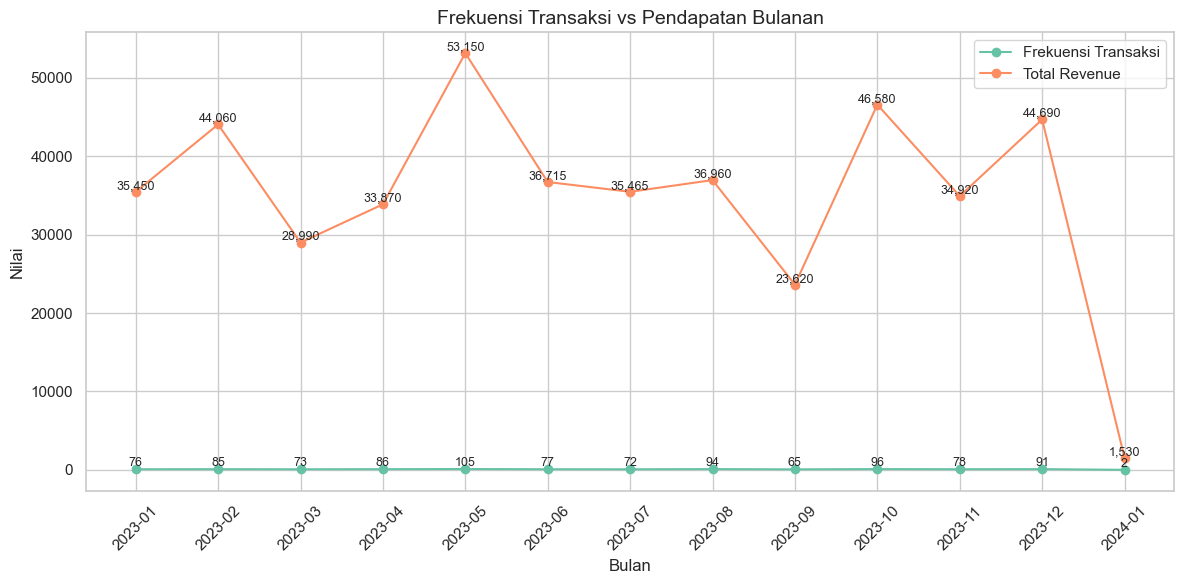

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# bikin kolom bulan
df['Month'] = df['Date'].dt.to_period('M')

# frekuensi transaksi per bulan
monthly_freq = df.groupby('Month').size()

# pendapatan per bulan
monthly_revenue = df.groupby('Month')['Total Amount'].sum()

# ambil 2 warna dari palette Set2
colors = sns.color_palette("Set2", 2)

# --- Plot ---
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")

# plot frekuensi transaksi
plt.plot(monthly_freq.index.astype(str), monthly_freq.values, 
         marker='o', color=colors[0], label="Frekuensi Transaksi")

# anotasi untuk frekuensi
for x, y in zip(monthly_freq.index.astype(str), monthly_freq.values):
    plt.text(x, y, f"{y:,}", ha='center', va='bottom', fontsize=9)

# plot revenue
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values, 
         marker='o', color=colors[1], label="Total Revenue")

# anotasi untuk revenue
for x, y in zip(monthly_revenue.index.astype(str), monthly_revenue.values):
    plt.text(x, y, f"{y:,.0f}", ha='center', va='bottom', fontsize=9)

plt.title("Frekuensi Transaksi vs Pendapatan Bulanan", fontsize=14)
plt.xlabel("Bulan")
plt.ylabel("Nilai")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Menyimpan gambar dengan resolusi tinggi (dpi 300)
plt.savefig('Frekuensi Transaksi vs Pendapatan Bulanan')
plt.show()

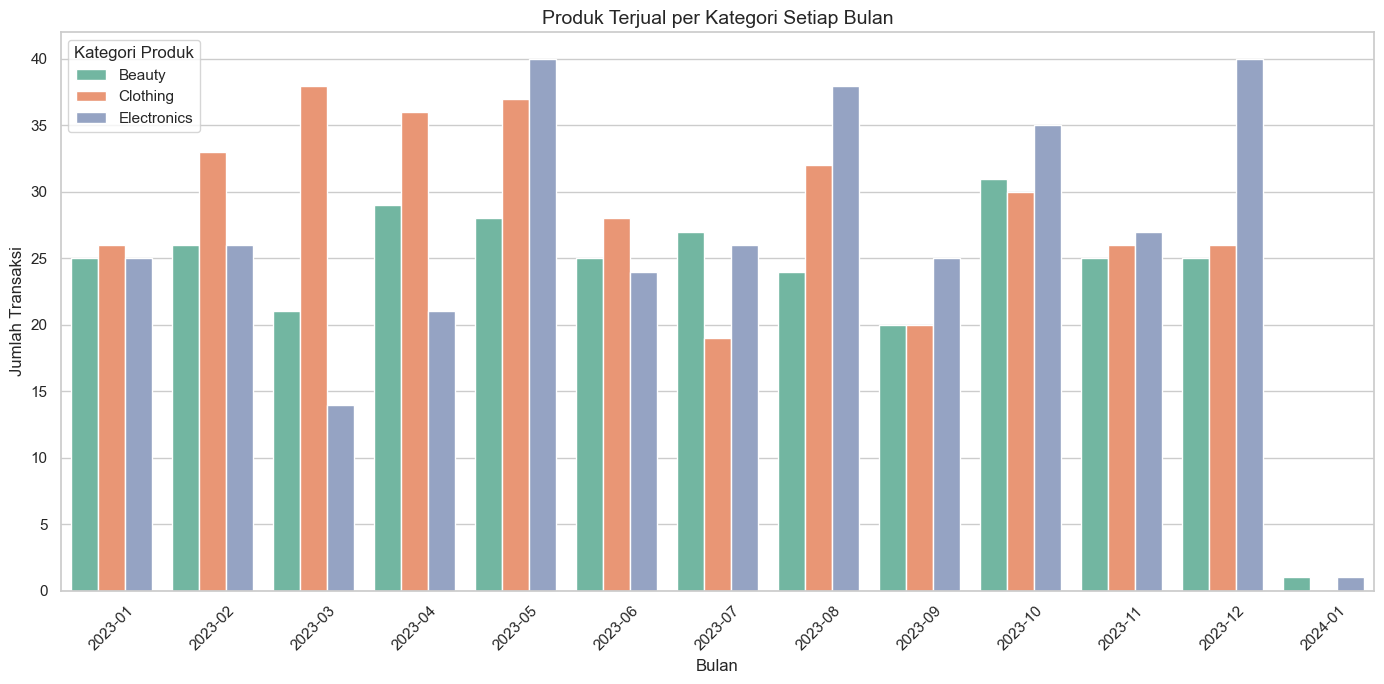

In [49]:
# hitung jumlah produk per kategori tiap bulan
monthly_sales = df.groupby(['Month', 'Product Category']).size().reset_index(name='Total Amount')

plt.figure(figsize=(14,7))
ax = sns.barplot(
    data=monthly_sales,
    x='Month',
    y='Total Amount',
    hue='Product Category',
    palette='Set2'
)

plt.title("Produk Terjual per Kategori Setiap Bulan", fontsize=14)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.legend(title="Kategori Produk")
plt.tight_layout()

# Menyimpan gambar dengan resolusi tinggi (dpi 300)
plt.savefig('Produk Terjual per Kategori Setiap Bulan.png', dpi=300, bbox_inches='tight')
plt.show()

## **C. Pria atau wanita yang dominan berbelanja? Produk apa saja yang dominan banyak dibeli pria dan wanita? Pria atau wanita yang dominan lebih banyak mengeluarkan uang?**

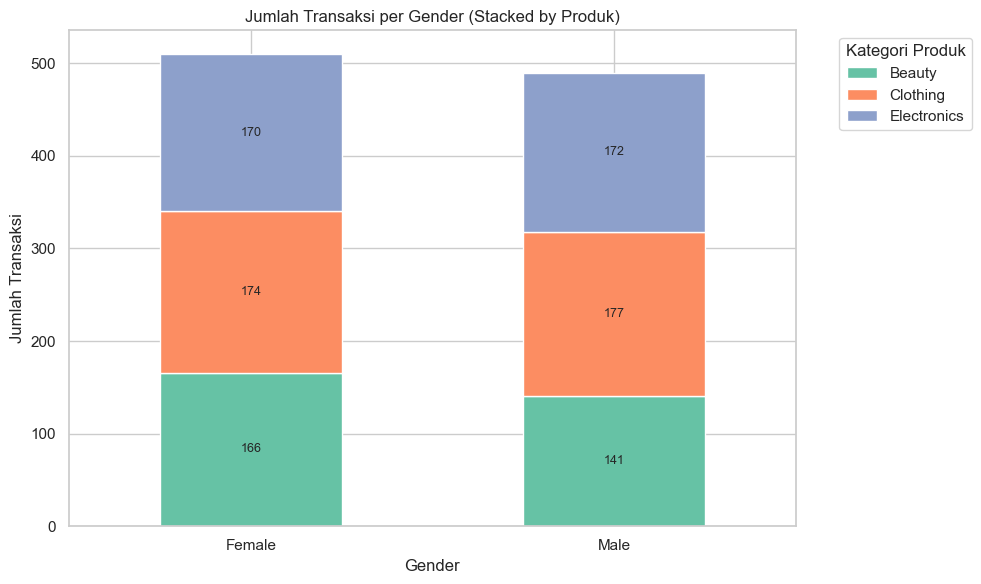

In [51]:
# --- 1. Hitung jumlah transaksi per Gender & Product_Category ---
transaksi_gender = df.groupby(["Gender", "Product Category"]).size().reset_index(name="Jumlah Transaksi")

# --- 2. Pivot biar bisa stacked bar ---
pivot_df = transaksi_gender.pivot(index="Gender", columns="Product Category", values="Jumlah Transaksi").fillna(0)

# --- 3. Plot stacked bar ---
colors = sns.color_palette("Set2", n_colors=len(pivot_df.columns))
ax = pivot_df.plot(kind="bar", stacked=True, figsize=(10,6), color=colors)

plt.title("Jumlah Transaksi per Gender (Stacked by Produk)")
plt.xlabel("Gender")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=0)
plt.legend(title="Kategori Produk", bbox_to_anchor=(1.05, 1), loc="upper left")

# --- 4. Tambahkan anotasi ---
for i, gender in enumerate(pivot_df.index):
    total_so_far = 0
    for j, category in enumerate(pivot_df.columns):
        value = pivot_df.loc[gender, category]
        if value > 0:
            ax.text(
                i, 
                total_so_far + value/2,   # posisi di tengah bar stack
                str(int(value)), 
                ha="center", va="center", fontsize=9
            )
        total_so_far += value

plt.tight_layout()

# Menyimpan gambar dengan resolusi tinggi (dpi 300)
plt.savefig('Jumlah Transaksi per Gender (Stacked by Produk).png', dpi=300, bbox_inches='tight')
plt.show()

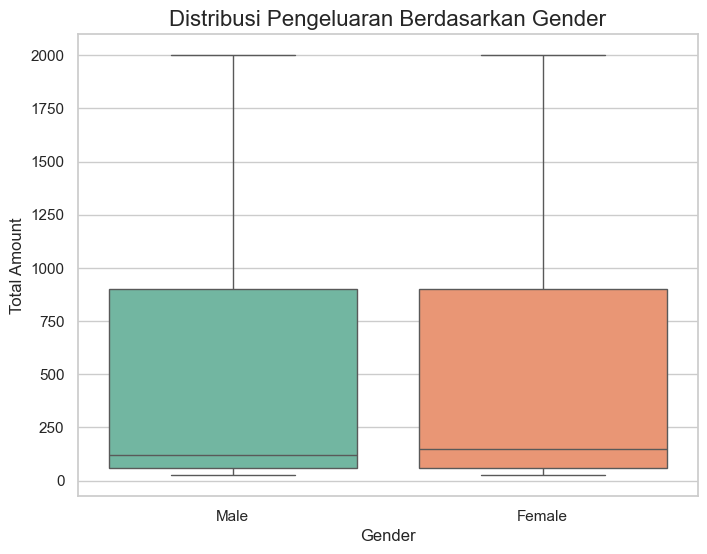

In [55]:
# Set style
sns.set_style("whitegrid")

plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x='Gender',
    y='Total Amount',
    hue='Gender',          
    palette='Set2',
    legend=False
)

plt.title('Distribusi Pengeluaran Berdasarkan Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)

# Menyimpan gambar dengan resolusi tinggi (dpi 300)
plt.savefig('Distribusi Pengeluaran Berdasarkan Gender.png', dpi=300, bbox_inches='tight')
plt.show()

## **D. Jika usia dikelompokkan (Remaja, Dewasa, Orang Tua) kelompok mana yang paling banyak bertransaksi? Produk apa yang paling dominan dibeli tiap kelompok usia? Kelompok mana yang dominan ngeluarin banyak uang?**

In [58]:
# Buat kategori usia
def categorize_age(age):
    if 12 <= age <= 25:
        return "Remaja"
    elif 26 <= age <= 45:
        return "Dewasa"
    elif 46 <= age <= 65:
        return "Lansia"
    else:
        return "Lainnya"

df['Age Group'] = df['Age'].apply(categorize_age)

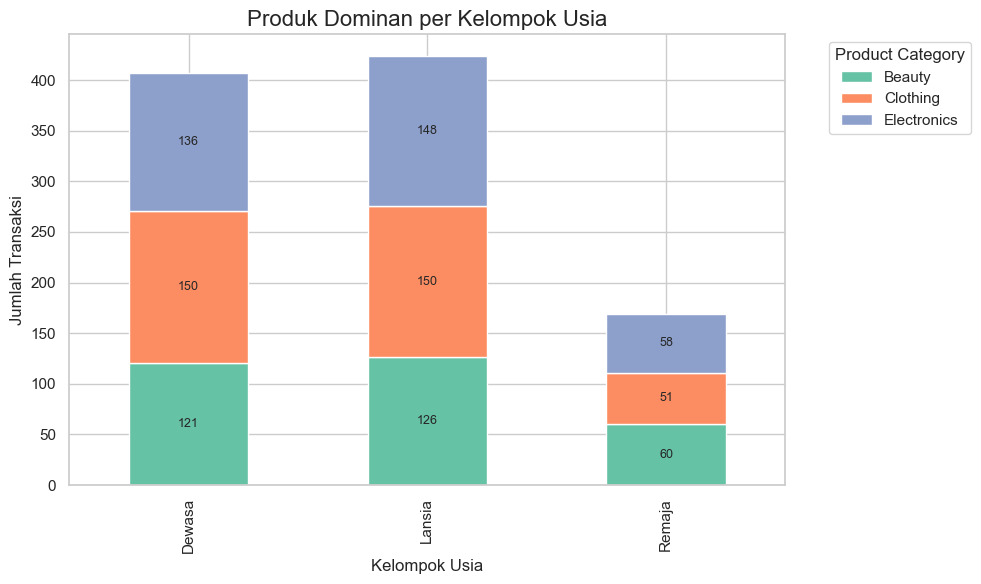

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah transaksi per Age Group & Product Category
age_product = df.groupby(['Age Group', 'Product Category']).size().unstack(fill_value=0)

# Plot stacked bar chart dengan palette Set2
ax = age_product.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=sns.color_palette("Set2", n_colors=len(age_product.columns))
)

plt.title("Produk Dominan per Kelompok Usia", fontsize=16)
plt.xlabel("Kelompok Usia", fontsize=12)
plt.ylabel("Jumlah Transaksi", fontsize=12)

# Anotasi jumlah pada tiap segmen
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=9)

plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Menyimpan gambar dengan resolusi tinggi (dpi 300)
plt.savefig('Produk Dominan per Kelompok Usia.png', dpi=300, bbox_inches='tight')
plt.show()

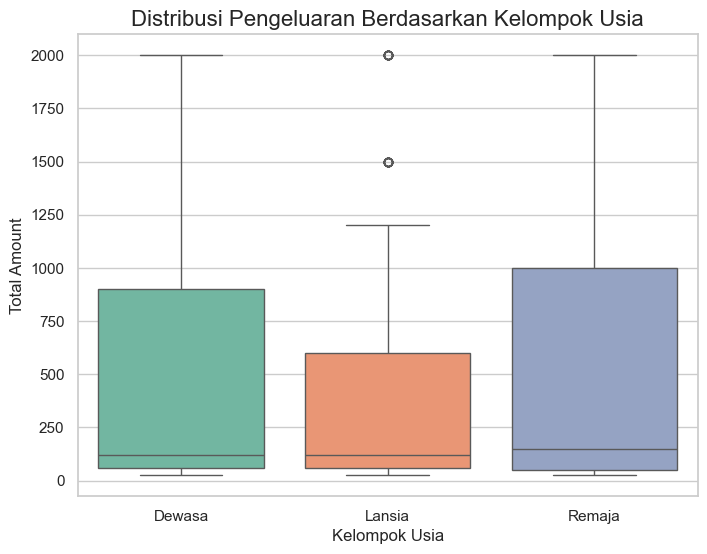

In [66]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x='Age Group',
    y='Total Amount',
    hue='Age Group',          
    palette='Set2',
    legend=False
)

plt.title("Distribusi Pengeluaran Berdasarkan Kelompok Usia", fontsize=16)
plt.xlabel("Kelompok Usia", fontsize=12)
plt.ylabel("Total Amount", fontsize=12)

# Menyimpan gambar dengan resolusi tinggi (dpi 300)
plt.savefig('Distribusi Pengeluaran Berdasarkan Kelompok Usia.png', dpi=300, bbox_inches='tight')
plt.show()

## **E. Apakah 20% transaksi menyumbang 80% revenue?**

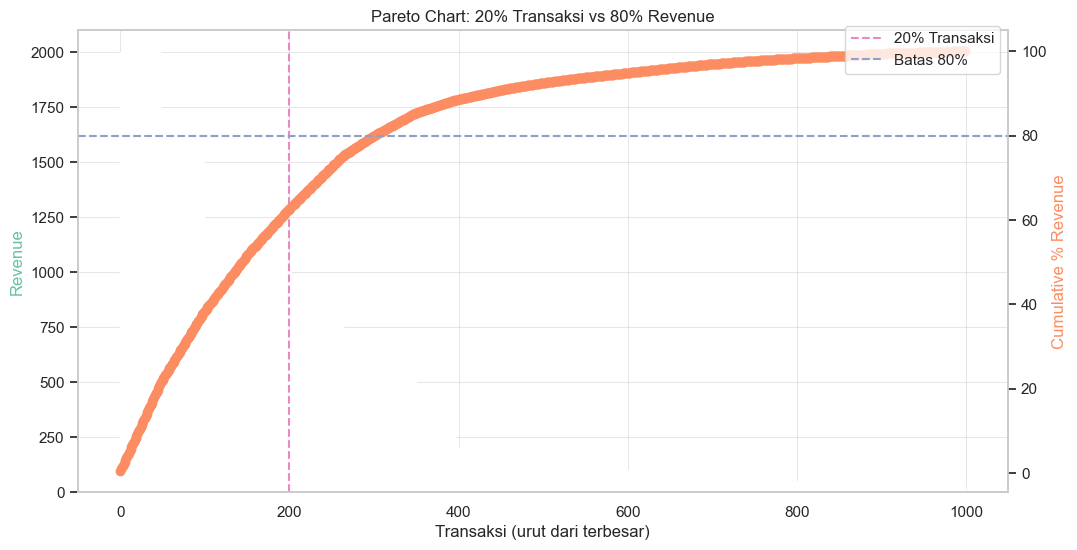

In [68]:
# --- 1. Hitung total revenue per transaksi ---
transaksi = df.groupby("Transaction ID")["Total Amount"].sum().reset_index()

# --- 2. Urutkan transaksi dari terbesar ke terkecil ---
transaksi = transaksi.sort_values(by="Total Amount", ascending=False).reset_index(drop=True)

# --- 3. Hitung persentase kontribusi & kumulatif ---
transaksi["Revenue %"] = transaksi["Total Amount"] / transaksi["Total Amount"].sum() * 100
transaksi["Cumulative %"] = transaksi["Revenue %"].cumsum()

# --- 4. Plot Pareto Chart dengan Set2 ---
sns.set(style="whitegrid")
colors = sns.color_palette("Set2")

fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart (Revenue per transaksi)
ax1.bar(transaksi.index, transaksi["Total Amount"], color=colors[0])
ax1.set_xlabel("Transaksi (urut dari terbesar)")
ax1.set_ylabel("Revenue", color=colors[0])

# Line chart (Cumulative %)
ax2 = ax1.twinx()
ax2.plot(transaksi.index, transaksi["Cumulative %"], color=colors[1], marker="o")
ax2.set_ylabel("Cumulative % Revenue", color=colors[1])

# Tambah garis horizontal 80%
ax2.axhline(80, color=colors[2], linestyle="--", label="Batas 80%")

# Tambah garis vertikal untuk 20% transaksi
n_transaksi = len(transaksi)
top_20 = int(0.2 * n_transaksi)
ax1.axvline(top_20, color=colors[3], linestyle="--", label="20% Transaksi")

# Atur grid agar solid
ax1.grid(True, linestyle='-', linewidth=0.7, alpha=0.5)  # solid grid
ax2.grid(False)  # matikan grid axis kanan

# Judul & legend
plt.title("Pareto Chart: 20% Transaksi vs 80% Revenue")
fig.legend(loc="upper right", bbox_to_anchor=(0.9,0.9))

# Menyimpan gambar dengan resolusi tinggi (dpi 300)
plt.savefig('Pareto Chart.png', dpi=300, bbox_inches='tight')
plt.show()